# Árvores II - Tarefa 2

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from altair import topo_feature
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
# Caminho para feture.txt
features_path  = "~/Desktop/UCI HAR Dataset/features.txt"

# Carregar os nomes das fetures
features = pd.read_csv(features_path, sep="\s+", header=None, usecols=[1], names=["feature_name"])
feature_names = features["feature_name"]

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_24717/2074543054.py:5: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv(features_path, sep="\s+", header=None, usecols=[1], names=["feature_name"])


In [41]:
# Caminho para subject_train.txt
subject_train_path = "~/Desktop/UCI HAR Dataset/train/subject_train.txt"

# Carregar os dados de indivíduos
subject_train = pd.read_csv(subject_train_path, sep="\s+", header=None, names=['subject'])

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_24717/2498940378.py:5: SyntaxWarning: invalid escape sequence '\s'
  subject_train = pd.read_csv(subject_train_path, sep="\s+", header=None, names=['subject'])


In [42]:
# Caminho para X_train.txt
X_train_path = "~/Desktop/UCI HAR Dataset/train/X_train.txt"

# Carregar os dados da base X_train
X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)

# Renomeiar as colunas de X_train
X_train.columns = feature_names

# Adicionar coluna 'subject' ao DataFrame
X_train['subject'] = subject_train['subject']

# Criar um índice duplo com a ordem dos dados e o identificador do indivíduo
X_train.index = pd.MultiIndex.from_arrays([X_train.index, X_train['subject']], names=["order", "subject"])

/tmp/ipykernel_24717/1510964614.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)


In [43]:
# Caminho para subject_text.txt
subject_test_path = "~/Desktop/UCI HAR Dataset/test/subject_test.txt"

# Caminho para X_test.txt
X_test_path = "~/Desktop/UCI HAR Dataset/test/X_test.txt"

# Carregar subject_test
subject_test = pd.read_csv(subject_test_path, sep="\s+", header=None, names=['subject'])

# Carregar X_test
X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)

# Renomear as colunas de X_test
X_test.columns = feature_names

# Adicionar coluna 'subject'
X_test['subject'] = subject_test['subject']

# Criar um indice duplo
X_test.index = pd.MultiIndex.from_arrays([X_test.index, X_test['subject']], names=["order", "subject"])

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_24717/3633044864.py:8: SyntaxWarning: invalid escape sequence '\s'
  subject_test = pd.read_csv(subject_test_path, sep="\s+", header=None, names=['subject'])
/tmp/ipykernel_24717/3633044864.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(X_test_path, delim_whitespace=True, header=None)


In [44]:
# Seleção das variáveis de interesse
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [46]:
X_train_selected.to_csv("~/Desktop/UCI HAR Dataset/train/X_train_selected.csv")
X_test_selected.to_csv("~/Desktop/UCI HAR Dataset/test/X_test_selected.csv")
subject_train.to_csv("~/Desktop/UCI HAR Dataset/train/subject_train.csv")
subject_test.to_csv("~/Desktop/UCI HAR Dataset/test/subject_test.csv")

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [47]:
X, y = np.arange(100).reshape(50, 2), np.random.choice([0, 1], size=50)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Train a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Predict the test set
y_pred = clf.predict(X_test)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Caminho para y_train e y_test
y_train_path = "~/Desktop/UCI HAR Dataset/train/y_train.txt"
y_test_path = "~/Desktop/UCI HAR Dataset/test/y_test.txt"

# Carregar os labels
y_train = pd.read_csv(y_train_path, sep="\s+", header=None, names=['activity'])
y_test = pd.read_csv(y_test_path, sep="\s+", header=None, names=['activity'])

# Instanciar e treinar o modelo
clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train_selected, y_train)

# Avaliar o modelo
train_accuracy = accuracy_score(y_train, clf.predict(X_train_selected))
test_accuracy = accuracy_score(y_test, clf.predict(X_test_selected))

print("Acuracia - treino:", train_accuracy)


Acuracia - treino: 0.5640642002176278


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_24717/2431008677.py:9: SyntaxWarning: invalid escape sequence '\s'
  y_train = pd.read_csv(y_train_path, sep="\s+", header=None, names=['activity'])
/tmp/ipykernel_24717/2431008677.py:10: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv(y_test_path, sep="\s+", header=None, names=['activity'])


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [49]:
%%time
# Assumindo que X e y já estão carregados e alinhados corretamente
# Dividir o conjunto de dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Etapa 1: Treine uma árvore de decisão inicial para encontrar a importância dos recursos
initial_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
initial_clf.fit(X_train, y_train)

# Extraia a importância dos recursos e selecione os 3 recursos mais importantes
importances = initial_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Índices de recursos classificados por importância (ordem decrescente)
top_3_indices = indices[:3]  # Os 3 principais índices de recursos

# Reduzir X apenas para os 3 principais recursos
X_train_reduced = X_train[:, top_3_indices]
X_val_reduced = X_val[:, top_3_indices]
X_test_reduced = X_test[:, top_3_indices]

# Etapa 2: Execute a poda de complexidade de custo no conjunto de dados reduzido
clf = DecisionTreeClassifier(random_state=42)

# Treinar usando poda de complexidade de custo (encontrar alfas efetivos)
path = clf.cost_complexity_pruning_path(X_train_reduced, y_train)
ccp_alphas = path.ccp_alphas  # Diferentes valores de ccp_alpha para tentar

# Armazena resultados de precisão para diferentes valores `ccp_alpha`
alpha_results = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_reduced, y_train)
    y_val_pred = clf.predict(X_val_reduced)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    alpha_results.append((alpha, val_accuracy))

# Encontre o melhor `ccp_alpha` com base na precisão do conjunto de validação
best_alpha, best_accuracy = max(alpha_results, key=lambda x: x[1])
print(f"Best ccp_alpha: {best_alpha}, Validation Accuracy: {best_accuracy}")

# Etapa 3: Retreine a árvore com o melhor ccp_alpha e avalie no conjunto de teste
final_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_clf.fit(X_train_reduced, y_train)

# Avaliar modelo final
y_test_pred = final_clf.predict(X_test_reduced)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Best ccp_alpha: 0.017857142857142856, Validation Accuracy: 0.7142857142857143
Test Accuracy: 0.375
CPU times: user 10.9 ms, sys: 936 μs, total: 11.9 ms
Wall time: 12 ms


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the final model on the test set
y_test_pred = final_clf.predict(X_test_reduced)

# Compute evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Display the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print("Confusion Matrix:")
print(test_confusion_matrix)

Test Accuracy: 0.3750
Test Precision: 0.4062
Test Recall: 0.3750
Test F1 Score: 0.3849
Confusion Matrix:
[[2 3]
 [2 1]]


no modelo acima acuracia teve um desenpenho de 37%
ja a precisao teve um teve 40% para preve a classe positiva
recall teve 37,50% dos positivos verdadeiros
ja a confusion matrix mostra a distribuicao das previsoes corretas e incorretas

modelo teve um desenpenho relativamente baixo especialmente em termos de accuracy

0.375


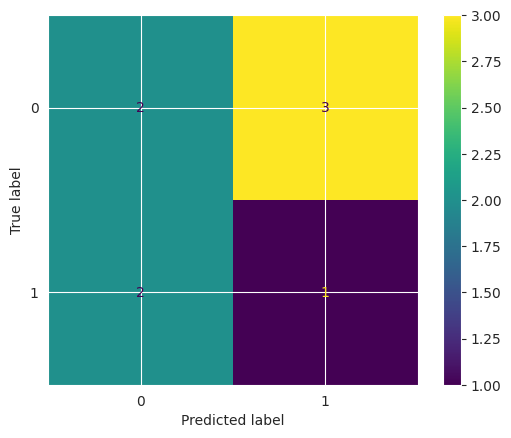

In [55]:
# Assuming X_train, y_train, X_test_reduced, and y_test are already defined

# Step 1: Define and train melhor_arvore (or any model you are using)
melhor_arvore = DecisionTreeClassifier(random_state=42)  # Initialize the model
melhor_arvore.fit(X_train, y_train)  # Train the model with training data

# Step 2: Compute the score and use it as intended
acuraria_test = melhor_arvore.score(X_test_reduced, y_test)  # Get model score
print(acuraria_test)

# Step 3 (optional): Example for plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_reduced, y_test)


a matriz de confusao gerada pelo codigo apresenta as seguintes informacoes
Eixos: O eixo x representa as classes previstas pelo modelo, e o eixo y
representa as classes verdadeiras (ou seja, as classes corretas).
Cores: As cores representam a quantidade de exemplos em cada célula.
Quanto mais escuro o tom, maior a quantidade de exemplos.